# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Standardizing the Gender Feature**

In [21]:
df = pd.read_csv('/content/survey_cleaned.csv')

In [22]:
df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [3]:
df['Gender'].nunique()

49

In [4]:
# make copy
df['Gender_Clean'] = df['Gender']

# convert to lowecase
df['Gender_Clean'] = df['Gender'].astype(str).str.lower().str.strip().fillna('')

In [5]:
df['Gender_Clean'].nunique()

41

In [6]:
male_variations = ['male', 'm', 'man', 'cis male', 'cis man', 'male ',
    'cis-male', 'male (cis)', 'malr', 'maile', 'msle', 'make',
    'male (trans)', 'male leaning androgynous', 'guy', 'male-ish',
    'cis male ', 'cis-male ', 'cis man ', 'cis man', 'cis male', 'cis man', 'gent', 'him']
female_variations = ['female', 'f', 'woman', 'cis female', 'cis woman', 'female ',
    'cis-female', 'female (cis)', 'cis-female ', 'cis female ',
    'female ', 'woman ', 'cis woman', 'she', 'her'
]

In [20]:
for i in range(len(df['Gender_Clean'])):
  if df.loc[i, 'Gender_Clean'] in female_variations:
    df.loc[i, 'Gender_Clean'] = 'female'
  elif df.loc[i, 'Gender_Clean'] in male_variations:
    df.loc[i, 'Gender_Clean'] = 'male'
  else:
    df.loc[i, 'Gender_Clean'] = 'other'

In [8]:
df['Gender_Clean'].unique()

array(['female', 'male', 'other'], dtype=object)

In [9]:
df['Gender_Clean'].value_counts()

,count
Gender_Clean,
male,990
female,244
other,25


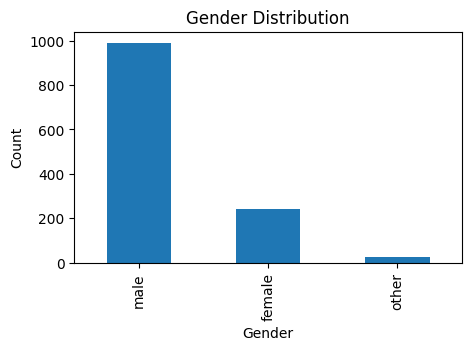

In [10]:
plt.figure(figsize=(5,3))
df['Gender_Clean'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

After standardizing the gender column, all responses were grouped into ‘male’, ‘female’, or ‘other’. The majority (937) were classified as ‘other’, likely due to ambiguous or non-binary responses. This cleaned column is now suitable for analysis and encoding

In [11]:
df = df.drop('Gender', axis=1)

In [19]:
df.to_csv('/content/survey_cleaned_II.csv', index = None)